# 10. 케라스를 사용한 인공 신경망 소개

In [1]:
# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)    
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 10.1 생물학적 뉴런에서 인공 뉴런까지

### 10.1.1 생물학적 뉴런

### 10.1.2 뉴런을 사용한 논리 연산

### 10.1.3 퍼셉트론

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int32)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([0], dtype=int32)

### 10.1.4 다층 퍼셉트론과 역전파

### 10.1.5 회귀를 위한 다층 퍼셉트론

### 10.1.6 분류를 위한 다층 퍼셉트론

## 10.2 케라스로 다층 퍼셉트론 구현하기

### 10.2.1 텐서플로2 설치

In [4]:
!python3 -m pip install tensorflow

In [5]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.13.0'

### 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [18]:
model.get_layer('dense_4') is hidden1

False

In [19]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.07069956,  0.02851167, -0.07412583, ..., -0.04584723,
         0.04795287, -0.03125305],
       [ 0.03678269, -0.01054567, -0.03338179, ...,  0.05706964,
        -0.064698  ,  0.04331894],
       [ 0.03103479, -0.02975034, -0.00388635, ..., -0.01207769,
        -0.0096683 ,  0.045645  ],
       ...,
       [ 0.01386178,  0.01302388, -0.07073557, ..., -0.03146289,
         0.03631281, -0.05941225],
       [ 0.04418054,  0.02033311, -0.01565163, ...,  0.06917742,
         0.04748305,  0.04221424],
       [-0.01652324,  0.05316241, -0.01560773, ...,  0.04923777,
        -0.03417987,  0.06897636]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7069 - accuracy: 0.7668 - val_loss: 0.5000 - val_accuracy: 0.8358
Epoch 2/30
1719/1719 [==============================] - 1s 861us/step - loss: 0.4863 - accuracy: 0.8302 - val_loss: 0.4803 - val_accuracy: 0.8274
Epoch 3/30
1719/1719 [==============================] - 1s 812us/step - loss: 0.4396 - accuracy: 0.8453 - val_loss: 0.4230 - val_accuracy: 0.8548
Epoch 4/30
1719/1719 [==============================] - 2s 874us/step - loss: 0.4109 - accuracy: 0.8557 - val_loss: 0.4026 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 2s 907us/step - loss: 0.3917 - accuracy: 0.8624 - val_loss: 0.3785 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 2s 890us/step - loss: 0.3762 - accuracy: 0.8672 - val_loss: 0.3870 - val_accuracy: 0.8636
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3631 - accuracy: 0.8714 - val_loss: 0.3506 - val

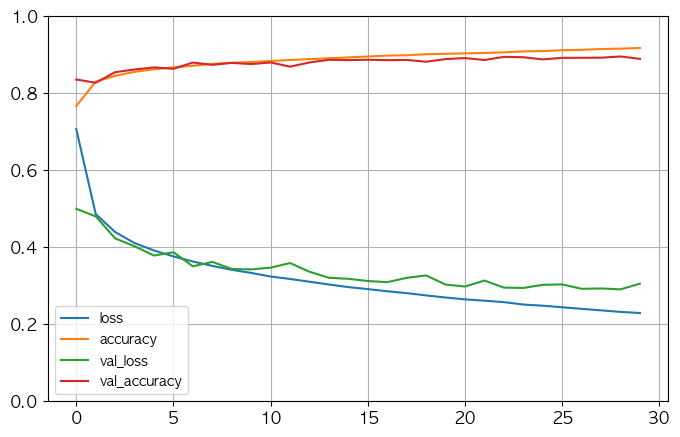

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 513us/step - loss: 0.3376 - accuracy: 0.8812


[0.337621808052063, 0.8812000155448914]

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 94ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 605us/step - loss: 0.8206 - val_loss: 0.5775
Epoch 2/20
363/363 [==============================] - 0s 486us/step - loss: 0.6710 - val_loss: 0.4500
Epoch 3/20
363/363 [==============================] - 0s 436us/step - loss: 0.4791 - val_loss: 0.4319
Epoch 4/20
363/363 [==============================] - 0s 402us/step - loss: 0.4615 - val_loss: 0.4206
Epoch 5/20
363/363 [==============================] - 0s 411us/step - loss: 0.4475 - val_loss: 0.4105
Epoch 6/20
363/363 [==============================] - 0s 429us/step - loss: 0.4383 - val_loss: 0.4068
Epoch 7/20
363/363 [==============================] - 0s 823us/step - loss: 0.4298 - val_loss: 0.4025
Epoch 8/20
363/363 [==============================] - 0s 781us/step - loss: 0.4233 - val_loss: 0.3961
Epoch 9/20
363/363 [==============================] - 0s 582us/step - loss: 0.4159 - val_loss: 0.3889
Epoch 10/20
363/363 [==============================] - 0s 676us/step - loss: 0.409

In [33]:
mse_test

0.3851504921913147

In [34]:
y_pred

array([[0.90019023],
       [0.8040142 ],
       [2.1368122 ]], dtype=float32)

### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

In [35]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs = [output])

In [37]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs = [input_A, input_B], outputs=[output])

In [39]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 602us/step - loss: 0.8069 - val_loss: 0.5012
Epoch 2/20
363/363 [==============================] - 0s 423us/step - loss: 0.5147 - val_loss: 0.4506
Epoch 3/20
363/363 [==============================] - 0s 422us/step - loss: 0.4796 - val_loss: 0.4348
Epoch 4/20
363/363 [==============================] - 0s 423us/step - loss: 0.4602 - val_loss: 0.4250
Epoch 5/20
363/363 [==============================] - 0s 421us/step - loss: 0.4483 - val_loss: 0.4098
Epoch 6/20
363/363 [==============================] - 0s 428us/step - loss: 0.4360 - val_loss: 0.4054
Epoch 7/20
363/363 [==============================] - 0s 503us/step - loss: 0.4280 - val_loss: 0.4071
Epoch 8/20
363/363 [==============================] - 0s 432us/step - loss: 0.4204 - val_loss: 0.3871
Epoch 9/20
363/363 [==============================] - 0s 470us/step - loss: 0.4199 - val_loss: 0.3823
Epoch 10/20
363/363 [==============================] - 0s 435us/step - loss: 0.405

In [55]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [57]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [58]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 759us/step - loss: 0.9908 - main_output_loss: 0.8911 - aux_output_loss: 1.8884 - val_loss: 0.5852 - val_main_output_loss: 0.5270 - val_aux_output_loss: 1.1089
Epoch 2/20
363/363 [==============================] - 0s 518us/step - loss: 0.5838 - main_output_loss: 0.5340 - aux_output_loss: 1.0322 - val_loss: 0.5223 - val_main_output_loss: 0.4781 - val_aux_output_loss: 0.9206
Epoch 3/20
363/363 [==============================] - 0s 514us/step - loss: 0.5369 - main_output_loss: 0.4990 - aux_output_loss: 0.8780 - val_loss: 0.4949 - val_main_output_loss: 0.4596 - val_aux_output_loss: 0.8134
Epoch 4/20
363/363 [==============================] - 0s 527us/step - loss: 0.5113 - main_output_loss: 0.4810 - aux_output_loss: 0.7840 - val_loss: 0.4726 - val_main_output_loss: 0.4428 - val_aux_output_loss: 0.7405
Epoch 5/20
363/363 [==============================] - 0s 500us/step - loss: 0.4926 - main_output_loss: 0.4665 - aux_output_loss: 0.7273 

In [59]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 364us/step - loss: 0.4585 - main_output_loss: 0.4432 - aux_output_loss: 0.5959


In [60]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 36ms/step


### 10.2.5 서브클래싱 API로 동적 모델 만들기

In [61]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

### 10.2.6 모델 저장과 복원

In [77]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [78]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 560us/step - loss: 1.6473 - val_loss: 0.9025
Epoch 2/10
363/363 [==============================] - 0s 414us/step - loss: 0.8752 - val_loss: 0.7491
Epoch 3/10
363/363 [==============================] - 0s 402us/step - loss: 0.7654 - val_loss: 0.6858
Epoch 4/10
363/363 [==============================] - 0s 439us/step - loss: 0.7076 - val_loss: 0.6431
Epoch 5/10
363/363 [==============================] - 0s 534us/step - loss: 0.6658 - val_loss: 0.6086
Epoch 6/10
363/363 [==============================] - 0s 411us/step - loss: 0.6325 - val_loss: 0.5814
Epoch 7/10
363/363 [==============================] - 0s 400us/step - loss: 0.6056 - val_loss: 0.5587
Epoch 8/10
363/363 [==============================] - 0s 402us/step - loss: 0.5840 - val_loss: 0.5401
Epoch 9/10
363/363 [==============================] - 0s 431us/step - loss: 0.5655 - val_loss: 0.5246
Epoch 10/10
162/162 [==============================] - 0s 279us/step - loss: 0.551

In [79]:
model.save("my_keras_model.h5")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
model = keras.models.load_model("my_keras_model.h5")

### 10.2.7 콜백 사용하기

In [81]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 336us/step - loss: 0.5374
Epoch 2/10
363/363 [==============================] - 0s 314us/step - loss: 0.5268
Epoch 3/10
363/363 [==============================] - 0s 321us/step - loss: 0.5173
Epoch 4/10
363/363 [==============================] - 0s 331us/step - loss: 0.5094
Epoch 5/10
363/363 [==============================] - 0s 324us/step - loss: 0.5021
Epoch 6/10
363/363 [==============================] - 0s 312us/step - loss: 0.4959
Epoch 7/10
363/363 [==============================] - 0s 313us/step - loss: 0.4902
Epoch 8/10
363/363 [==============================] - 0s 315us/step - loss: 0.4851
Epoch 9/10
363/363 [==============================] - 0s 389us/step - loss: 0.4808
Epoch 10/10
363/363 [==============================] - 0s 319us/step - loss: 0.4766


In [82]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 0s 647us/step - loss: 0.4728 - val_loss: 0.4449
Epoch 2/10
309/363 [========================>.....] - ETA: 0s - loss: 0.4714

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 0s 787us/step - loss: 0.4692 - val_loss: 0.4418
Epoch 3/10
363/363 [==============================] - 0s 428us/step - loss: 0.4658 - val_loss: 0.4389
Epoch 4/10
363/363 [==============================] - 0s 436us/step - loss: 0.4628 - val_loss: 0.4370
Epoch 5/10
363/363 [==============================] - 0s 419us/step - loss: 0.4601 - val_loss: 0.4348
Epoch 6/10
363/363 [==============================] - 0s 417us/step - loss: 0.4576 - val_loss: 0.4321
Epoch 7/10
363/363 [==============================] - 0s 419us/step - loss: 0.4551 - val_loss: 0.4307
Epoch 8/10
363/363 [==============================] - 0s 428us/step - loss: 0.4527 - val_loss: 0.4294
Epoch 9/10
363/363 [==============================] - 0s 420us/step - loss: 0.4507 - val_loss: 0.4267
Epoch 10/10
363/363 [==============================] - 0s 460us/step - loss: 0.4486 - val_loss: 0.4253


In [83]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 574us/step - loss: 0.4466 - val_loss: 0.4234
Epoch 2/100
363/363 [==============================] - 0s 408us/step - loss: 0.4448 - val_loss: 0.4227
Epoch 3/100
  1/363 [..............................] - ETA: 0s - loss: 0.3646

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 0s 528us/step - loss: 0.4427 - val_loss: 0.4204
Epoch 4/100
363/363 [==============================] - 0s 421us/step - loss: 0.4411 - val_loss: 0.4187
Epoch 5/100
363/363 [==============================] - 0s 404us/step - loss: 0.4393 - val_loss: 0.4198
Epoch 6/100
363/363 [==============================] - 0s 412us/step - loss: 0.4377 - val_loss: 0.4167
Epoch 7/100
363/363 [==============================] - 0s 440us/step - loss: 0.4361 - val_loss: 0.4155
Epoch 8/100
363/363 [==============================] - 0s 435us/step - loss: 0.4346 - val_loss: 0.4131
Epoch 9/100
363/363 [==============================] - 0s 437us/step - loss: 0.4328 - val_loss: 0.4120
Epoch 10/100
363/363 [==============================] - 0s 418us/step - loss: 0.4313 - val_loss: 0.4106
Epoch 11/100
363/363 [==============================] - 0s 417us/step - loss: 0.4296 - val_loss: 0.4092
Epoch 12/100
363/363 [==============================] - 0s 481us/step - loss: 0.428

In [84]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {}:.2f'.format(logs['val_loss'] / logs['loss']))

### 10.2.8 텐서보드를 사용해 시각화하기

In [85]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [86]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [87]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [88]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 854us/step - loss: 2.0421 - val_loss: 0.8976
Epoch 2/30
363/363 [==============================] - 0s 501us/step - loss: 0.8169 - val_loss: 0.7202
Epoch 3/30
363/363 [==============================] - 0s 443us/step - loss: 0.7154 - val_loss: 0.6543
Epoch 4/30
363/363 [==============================] - 0s 441us/step - loss: 0.6616 - val_loss: 0.6105
Epoch 5/30
363/363 [==============================] - 0s 473us/step - loss: 0.6253 - val_loss: 0.5797
Epoch 6/30
363/363 [==============================] - 0s 433us/step - loss: 0.5967 - val_loss: 0.5545
Epoch 7/30
363/363 [==============================] - 0s 435us/step - loss: 0.5749 - val_loss: 0.5344
Epoch 8/30
363/363 [==============================] - 0s 450us/step - loss: 0.5570 - val_loss: 0.5197
Epoch 9/30
363/363 [==============================] - 0s 432us/step - loss: 0.5424 - val_loss: 0.5064
Epoch 10/30
363/363 [==============================] - 0s 432us/step - loss: 0.530

In [89]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

## 10.3 신경망 하이퍼파라미터 튜닝하기

In [90]:
def build_model(n_hidden=1, n_neurons=30, learning_rate = 3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [95]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model)

In [96]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 0s 541us/step - loss: 0.8000 - val_loss: 0.5068
Epoch 2/100
363/363 [==============================] - 0s 400us/step - loss: 0.5069 - val_loss: 0.4609
Epoch 3/100
363/363 [==============================] - 0s 398us/step - loss: 0.4738 - val_loss: 0.4332
Epoch 4/100
363/363 [==============================] - 0s 407us/step - loss: 0.4541 - val_loss: 0.4264
Epoch 5/100
363/363 [==============================] - 0s 405us/step - loss: 0.4442 - val_loss: 0.4158
Epoch 6/100
363/363 [==============================] - 0s 477us/step - loss: 0.4346 - val_loss: 0.4121
Epoch 7/100
363/363 [==============================] - 0s 401us/step - loss: 0.4297 - val_loss: 0.4040
Epoch 8/100
363/363 [==============================] - 0s 400us/step - loss: 0.4219 - val_loss: 0.3968
Epoch 9/100
363/363 [==============================] - 0s 401us/step - loss: 0.4154 - val_loss: 0.3921
Epoch 10/100
363/363 [==============================] - 0s 401us/step - l

1/1 [==============================] - 0s 9ms/step


In [102]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: Invalid parameter n_neurons for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(n_neurons=79)`
Check the list of available parameters with `estimator.get_params().keys()`

In [107]:
rnd_search_cv.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [108]:
rnd_search_cv.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

### 10.3.1 은닉층 개수

### 10.3.2 은닉층의 뉴런 개수

### 10.3.3 학습률, 배치 크기 그리고 다른 하이퍼파라미터

## 10.4 연습문제

### 10

In [109]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [112]:
X_train_full.shape

(60000, 28, 28)

In [114]:
X_train_full.dtype

dtype('uint8')

In [115]:
X_train, X_valid = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_train, y_valid = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

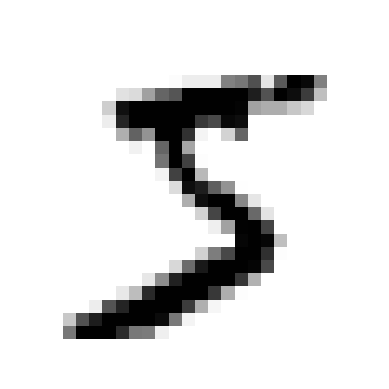

In [119]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [120]:
y_train

array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

In [121]:
X_valid.shape

(55000, 28, 28)

In [123]:
X_test.shape

(10000, 28, 28)

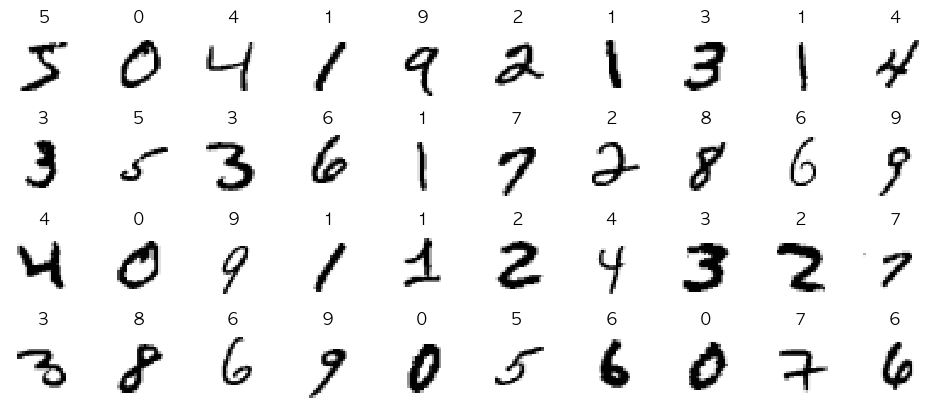

In [124]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [158]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [196]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [197]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [198]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=4e-1),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [199]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

157/157 [==============================] - 1s 7ms/step - loss: 0.8723 - accuracy: 0.7312 - val_loss: 3.4430 - val_accuracy: 0.6017


Text(0, 0.5, 'Loss')

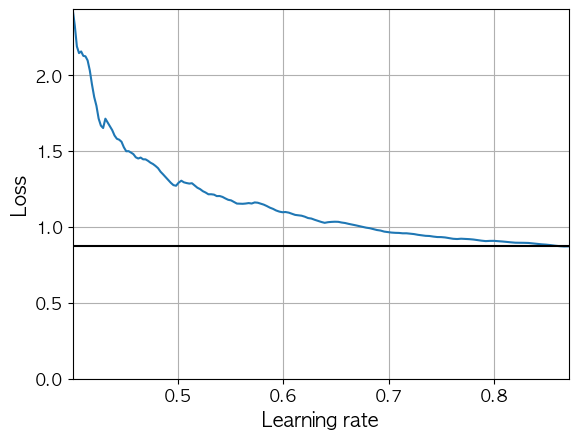

In [200]:
plt.plot(expon_lr.rates, expon_lr.losses)
# plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates), 'black')
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, max(expon_lr.losses)])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [201]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [202]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [203]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [204]:
run_index = 1 # 실행할 때마다 이 값을 늘립니다
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [205]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
157/157 [==============================] - 1s 8ms/step - loss: 0.6256 - accuracy: 0.7992 - val_loss: 0.9995 - val_accuracy: 0.7560
Epoch 2/100
113/157 [====================>.........] - ETA: 0s - loss: 0.2362 - accuracy: 0.9267

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 1s 6ms/step - loss: 0.2368 - accuracy: 0.9250 - val_loss: 0.2930 - val_accuracy: 0.9090
Epoch 3/100
157/157 [==============================] - 1s 6ms/step - loss: 0.1413 - accuracy: 0.9562 - val_loss: 0.2493 - val_accuracy: 0.9247
Epoch 4/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0937 - accuracy: 0.9696 - val_loss: 0.2480 - val_accuracy: 0.9261
Epoch 5/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0480 - accuracy: 0.9868 - val_loss: 0.2091 - val_accuracy: 0.9407
Epoch 6/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0310 - accuracy: 0.9916 - val_loss: 0.2336 - val_accuracy: 0.9361
Epoch 7/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0180 - accuracy: 0.9960 - val_loss: 0.2134 - val_accuracy: 0.9432
Epoch 8/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0069 - accuracy: 0.9994 - val_loss: 0.2066 - val_accuracy: 0.9472
Epoch 9/100

In [206]:
model = keras.models.load_model('my_mnist_model.h5')
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 527us/step - loss: 0.1909 - accuracy: 0.9495


[0.19090034067630768, 0.9495000243186951]